In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CodSoft/Task_2/Titanic dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [49]:
df=df.drop(['PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  34.5      0      0   7.8292
1         1       3  female  47.0      1      0   7.0000
2         0       2    male  62.0      0      0   9.6875
3         0       3    male  27.0      0      0   8.6625
4         1       3  female  22.0      1      1  12.2875


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  34.5      0      0   7.8292
1         1       3    0  47.0      1      0   7.0000
2         0       2    1  62.0      0      0   9.6875
3         0       3    1  27.0      0      0   8.6625
4         1       3    0  22.0      1      1  12.2875


In [51]:
missing_values = df.isnull().sum()
print(missing_values)

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64


In [52]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
mean_age = df['Fare'].mean()
df['Fare'].fillna(mean_age, inplace=True)

In [53]:
missing_values = df.isnull().sum()
print(missing_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create instances of classification models
svm_model = SVC()
random_forest_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Choose the number of folds (k) for cross-validation
k_folds = 5

# Perform k-fold cross-validation and get performance metrics
svm_scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=k_folds)
random_forest_scores = cross_val_score(random_forest_model, X, y, scoring='accuracy', cv=k_folds)
gbm_scores = cross_val_score(gbm_model, X, y, scoring='accuracy', cv=k_folds)

# Calculate mean accuracy for each model
mean_svm_score = svm_scores.mean()
mean_random_forest_score = random_forest_scores.mean()
mean_gbm_score = gbm_scores.mean()

print("Mean SVM Accuracy:", mean_svm_score)
print("Mean Random Forest Accuracy:", mean_random_forest_score)
print("Mean GBM Accuracy:", mean_gbm_score)

# Choose the best model based on the mean accuracy
best_accuracy = max(mean_svm_score, mean_random_forest_score, mean_gbm_score)

if best_accuracy == mean_svm_score:
    chosen_model = svm_model
elif best_accuracy == mean_random_forest_score:
    chosen_model = random_forest_model
else:
    chosen_model = gbm_model

print("Best Model is:", chosen_model)

# Fit the best model on the entire dataset
chosen_model.fit(X_train, y_train)

# Make predictions using the best model
predictions = chosen_model.predict(X_test)

Mean SVM Accuracy: 0.6267641996557659
Mean Random Forest Accuracy: 1.0
Mean GBM Accuracy: 1.0
Best Model is: RandomForestClassifier()


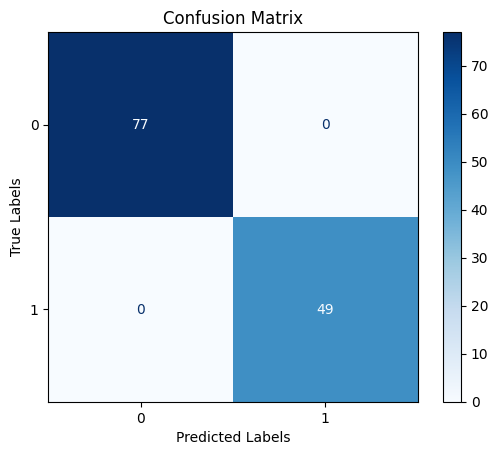

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using matplotlib
classes = [0,1]  # Replace the class names as per your dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
